# Introduction

A decision tree is essentially a series of if-then statements, that, when applied to a record in a data set, results in the classification of that record. Therefore, once you've created your decision tree, you will be able to run a data set through the program and get a classification for each individual record within the data set. What this means to you, as a manufacturer of quality widgets, is that the program you create from this article will be able to predict the likelihood of each user, within a data set, purchasing your finely crafted product.

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

<img src="images/2.gif">

# How decision tree works


The understanding level of Decision Trees algorithm is so easy compared with other classification algorithms. The decision tree algorithm tries to solve the problem, by using tree representation. Each internal node of the tree corresponds to an attribute, and each leaf node corresponds to a class label.

## Decision Tree Algorithm Pseudocode

   * Place the best attribute of the dataset at the root of the tree.
   * Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.
   * Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.
 

### Decision Tree classifier
In decision trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

We continue comparing our record’s attribute values with other internal nodes of the tree until we reach a leaf node with predicted class value. As we know how the modeled decision tree can be used to predict the target class or the value. Now let’s understanding how we can create the decision tree model.

### Assumptions while creating Decision Tree

The below are the some of the assumptions we make while using Decision tree:

   * At the beginning, the whole training set is considered as the root.
   * Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model.
   * Records are distributed recursively on the basis of attribute values.
   * Order to placing attributes as root or internal node of the tree is done by using some statistical approach.


# How to split nodes

There are few algorithms to find optimum split. Let's look at the following to understand the mathematics behind.

### Entropy

An alternative splitting criterion for decision tree learning algorithms is *information gain*. It measures how well a particular attribute distinguishes among different target classifications. Information gain is measured in terms of the expected reduction in the entropy or impurity of the data. The entropy of a set of probabilities is:

$$H(p) = -\sum_i p_i log_2(p_i)$$

If we have a set of binary responses from some variable, all of which are positive/true/1, then knowing the values of the variable does not hold any predictive value for us, since all the outcomes are positive. Hence, the entropy is zero:

<img src="images/ent.png">

In [129]:
import os
import numpy as np

In [130]:
os.getcwd()

'/Users/pradmishra/Documents/decision tree_ml4'

In [131]:
df = pd.read_table('diabetes.txt')

In [132]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [133]:
np.round(df.Outcome.value_counts()/df.shape[0],2)

0    0.65
1    0.35
Name: Outcome, dtype: float64

In [134]:
Eb = -(0.65)*np.log2(0.65) + -(0.35)*np.log2(0.35)

In [135]:
Eb # Entropy Before Split

0.934068055375491

In [136]:
set(df.Pregnancies)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17}

In [137]:
RHSdf = df[df.Pregnancies > 12]
np.round(RHSdf.Outcome.value_counts()/RHSdf.shape[0],2)

1    0.64
0    0.36
Name: Outcome, dtype: float64

In [138]:
Erhs = -(0.64)*np.log2(0.64) + -(0.36)*np.log2(0.36)

In [139]:
LHSdf = df[df.Pregnancies <= 12]
np.round(LHSdf.Outcome.value_counts()/LHSdf.shape[0],2)

0    0.66
1    0.34
Name: Outcome, dtype: float64

In [140]:
Elhs = -(0.66)*np.log2(0.66) + -(0.34)*np.log2(0.34)

In [141]:
#Entropy after applying the splitting criteria

In [142]:
Ea = ((RHSdf.shape[0]/df.shape[0])*Erhs)+((LHSdf.shape[0]/df.shape[0])*Elhs)
Ea

0.9251443596344292

In [143]:
# What is the information gain = . Entropy before split - Entropy After Split

In [144]:
Eb - Ea # Information Gain from Pregnancies


0.008923695741061777

In [145]:
#E = -(0.5)*np.log2(0.5) + -(0.5)*np.log2(0.5)

In [146]:
#E = -(0.8)*np.log2(0.8) + -(0.2)*np.log2(0.2)

The entropy calculation tells us how much additional information we would obtain with knowledge of the variable.

So, if we have a set of candidate covariates from which to choose as a node in a decision tree, we should choose the one that gives us the most information about the response variable (*i.e.* the one with the highest entropy).

### Misclassification Rate

Alternatively, we can use the misclassification rate:

$$C(j,t) = \frac{1}{n_{jt}} \sum_{y_i: x_{ij} \gt t} I(y_i \ne \hat{y})$$

where $\hat{y}$ is the most probable class label and $n_{ij}$ is the number of observations in the data subset obtained from splitting via $j,t$.

### Gini index

The Gini index is simply the expected error rate:

$$C(j,t) = \sum_{k=1}^K \hat{\pi}_{jt}[k] (1 - \hat{\pi}_{jt}[k]) = 1 - \sum_{k=1}^K \hat{\pi}_{jt}[k]^2$$

where $\hat{\pi}_{jt}[k]$ is the probability of an observation being correctly classified as class $k$ for the data subset obtained from splitting via $j,t$ (hence, $(1 - \hat{\pi}_{jt}[k])$ is the misclassification probability).

## ID3

A given cost function can be used to construct a decision tree via one of several algorithms. The Iterative Dichotomiser 3 (ID3) is on such algorithm, which uses entropy, and a related concept, *information gain*, to choose features and partitions at each classification step in the tree.

Information gain is the difference between the current entropy of a system and the entropy measured after a feature is chosen. If $S$ is a set of examples and $X$ is a possible feature on which to partition the examples, then:

$$G(S,X) = \text{Entropy}(S) - \sum_{x \in X} \frac{\#(S_x)}{\#(S)} \text{Entropy}(S_x)$$

where $\#$ is the count function and $x$ is a particular value of $X$.

Let's say $S$ is a set of survival events, $S = \{s_1=survived, s_2=died, s_3=died, s_4=died\}$ and a particular variable $X$ can have values $\{x_1, x_2, x_3\}$. To perform a sample calculation of information gain, we will say that:

* $X(s_1) = x_2$
* $X(s_2) = x_2$
* $X(s_3) = x_3$
* $X(s_4) = x_1$

The current entropy of this state is:

$$\begin{align}
\text{Entropy}(S) &= -p^{(+)} \log_2(p^{(+)}) - p^{(-)} \log_2(p^{(-)}) \\
&= -0.25 \log_2(0.25) - 0.75 \log_2(0.75) \\
&= 0.5 + 0.311 = 0.811
\end{align}$$

Now, we need to compute the information after selecting variable $X$, which is the sum of three terms:

$$\begin{align}
\frac{\#(S_{x1})}{\#(S)} \text{Entropy}(S) &= 0.25 (-0 \log_2(0) - 1 \log_2(1)) = 0\\
\frac{\#(S_{x2})}{\#(S)} \text{Entropy}(S) &= 0.5 (-0.5 \log_2(0.5) - 0.5 \log_2(0.5) = 0.5\\
\frac{\#(S_{x3})}{\#(S)} \text{Entropy}(S) &= 0.25 (-0 \log_2(0) - 1 \log_2 1) = 0\\
\end{align}$$

Therefore, the information gain is:

$$G(S,X) = 0.811 - (0 + 0.5 + 0) = 0.311$$


<img src="images/com.png">

# Implementation using scikit-learn

In [147]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

In [148]:
import os

## Load and prep the data

In [149]:
# load the iris data
df = pd.read_csv('iris.csv')
df['species_label'], _ = pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [150]:
# select features
y = df['species_label']
X = df[[#'petal_length', #'petal_width',
        'sepal_length','sepal_width']]

In [151]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

## Train the model and make predictions

Note we didn't have to standardize the data to use a decision tree.

In [152]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy',
                                   random_state=5)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [153]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)
y_pred

array([1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 1, 1,
       0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0,
       0])

## Evaluate the model's performance

Including the tree's axis-parallel decision boundaries and how the tree splits

In [154]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 15
Accuracy: 0.67


### Visualization

For visualizing decision tree splits I am creating **plot_decision()** function below using matplotlib. If you dont understand the implementation completely that's fine. It is just for the understanding.

In [155]:
from matplotlib.colors import ListedColormap


def plot_decision(X, y, classifier, test_idx=None, resolution=0.02, figsize=(8,8)):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('#cc0000', '#003399', '#00cc00', '#999999', '#66ffff')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # get dimensions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    xmin = xx1.min()
    xmax = xx1.max()
    ymin = xx2.min()
    ymax = xx2.max()
    
    # create the figure
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    # plot the decision surface
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap, zorder=1)
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.6, 
                   c=cmap(idx),
                   edgecolor='black',
                   marker='o',#markers[idx],
                   s=50,
                   label=cl,
                   zorder=3)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='w',
                   alpha=1.0,
                   edgecolor='black',
                   linewidths=1,
                   marker='o',
                   s=150, 
                   label='test set',
                   zorder=2)

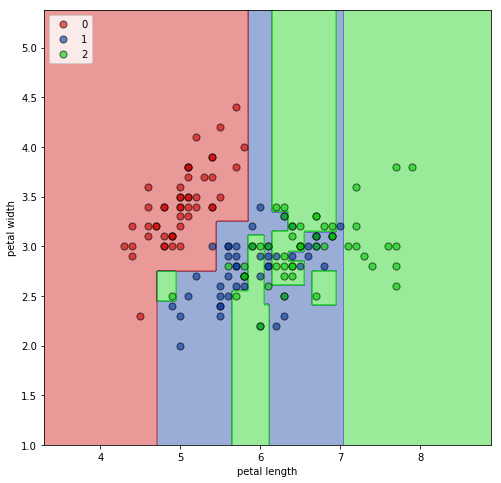

In [156]:
# visualize the model's decision regions to see how it separates the samples
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined, y=y_combined, classifier=dtree)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

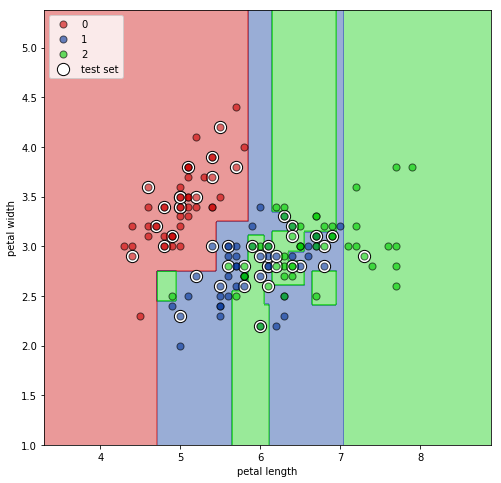

In [157]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined, y=y_combined, classifier=dtree, test_idx=test_idx)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Now visualize how the tree splits using [GraphViz](http://www.graphviz.org/) (make sure you install it first):

In [158]:
dtree.feature_importances_

array([0.71149556, 0.28850444])

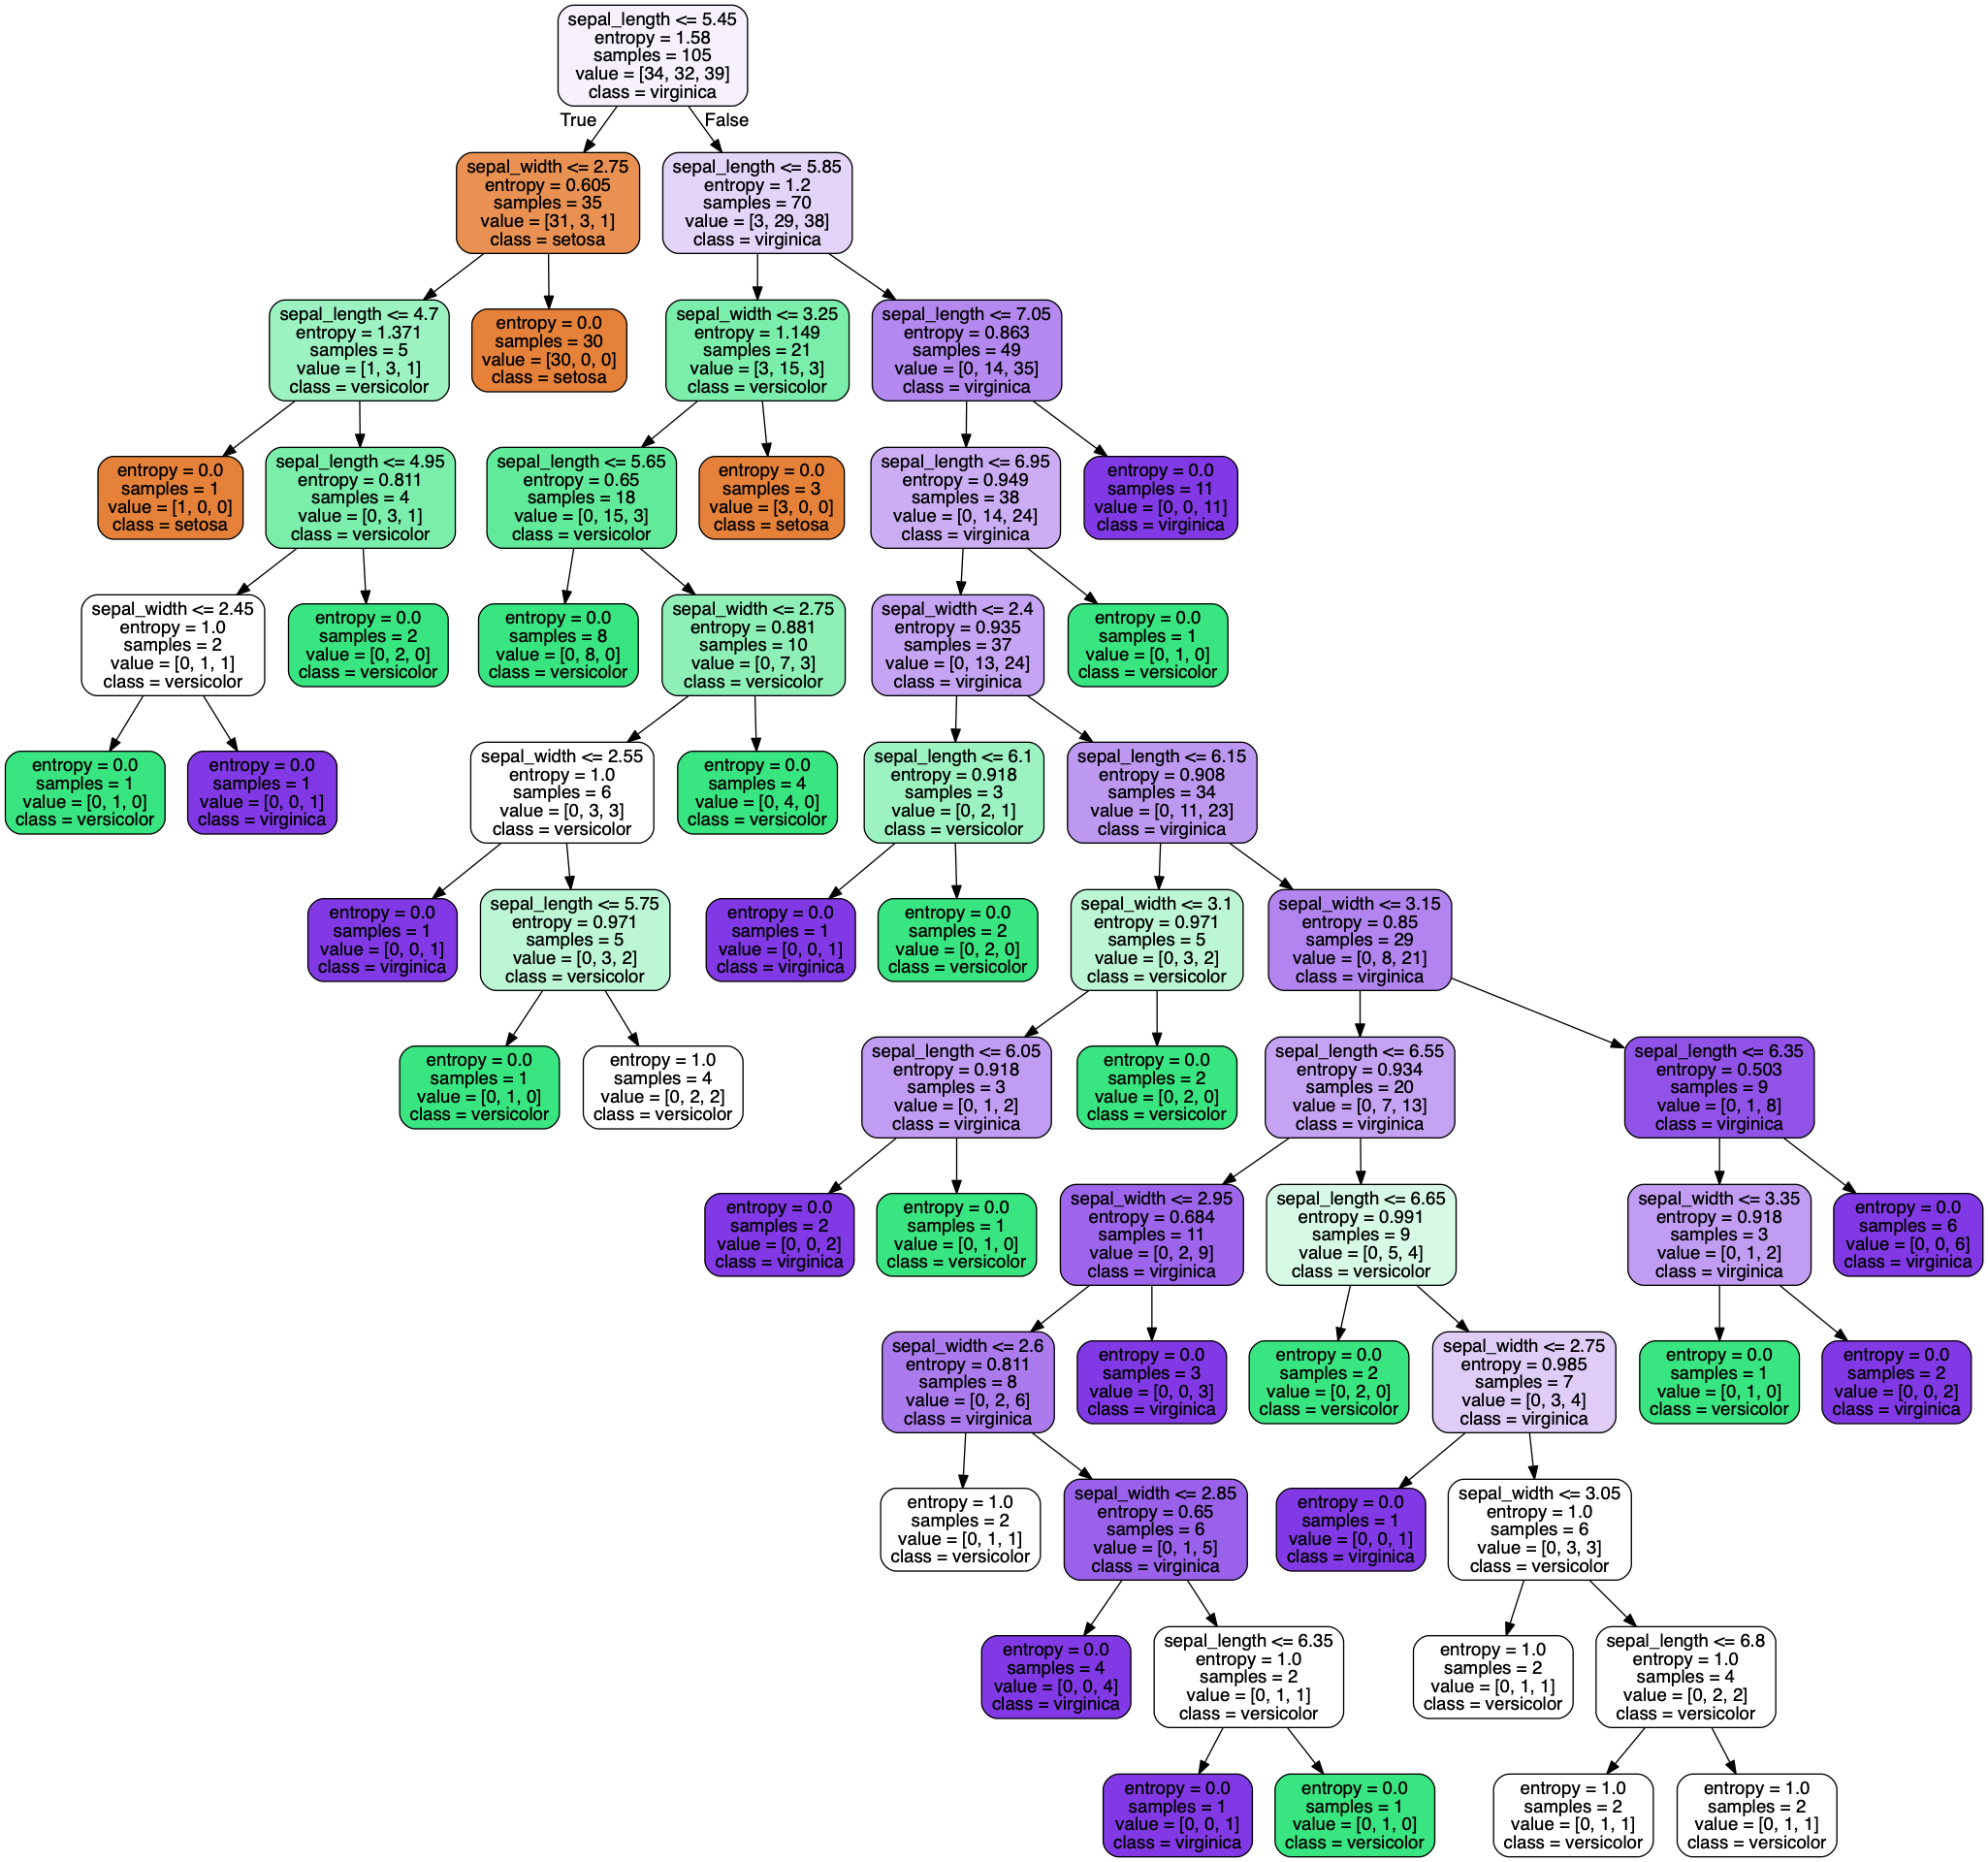

In [159]:
dot_data = tree.export_graphviz(dtree, 
                                out_file=None, 
                                filled=True, 
                                rounded=True,
                                feature_names=[#'petal length', 
                                               #'petal width',
                                              'sepal_length',
                                               'sepal_width'],  
                                class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

### Cross Validation

Cross Validation is a technique which involves reserving a particular sample of a data set on which you do not train the model. Later, you test the model on this sample before finalizing the model.

Here are the steps involved in cross validation:

   * You reserve a sample data set.
   * Train the model using the remaining part of the data set.
   * Use the reserve sample of the data set test (validation) set. This will help you to know the effectiveness of model performance. It your model delivers a positive result on validation data, go ahead with current model. It rocks!
   
   
<img src="images/crossval.png">

### Holdout Validation and Cross Validation

When creating a predictive model, we'd like to get an accurate sense of its ability to generalize to unseen data before actually going out and using it on unseen data. As we saw earlier, generating predictions on the training data itself to check the model's accuracy does not work very well: a complex model may fit the training data extremely closely but fail to generalize to new, unseen data. We can get a better sense of a model's expected performance on unseen data by setting a portion of our training data aside when creating a model, and then using that set aside data to evaluate the model's performance. This technique of setting aside some of the training data to assess a model's ability to generalize is known as validation.

Holdout validation and cross validation are two common methods for assessing a model before using it on test data. Holdout validation involves splitting the training data into two parts, a training set and a validation set, building a model with the training set and then assessing performance with the validation set. In theory, model performance on the hold-out validation set should roughly mirror the performance you'd expect to see on unseen test data. In practice, holdout validation is fast and it can work well, especially on large data sets, but it has some pitfalls.

Reserving a portion of the training data for a holdout set means you aren't using all the data at your disposal to build your model in the validation phase. This can lead to suboptimal performance, especially in situations where you don't have much data to work with. In addition, if you use the same holdout validation set to assess too many different models, you may end up finding a model that fits the validation set well due to chance that won't necessarily generalize well to unseen data. Despite these shortcomings, it is worth learning how to use a holdout validation set in Python.

In [160]:
from sklearn.cross_validation import KFold

cv = KFold(n=len(X),  # Number of elements
           n_folds=10,            # Desired number of cv folds
           random_state=12) 

After creating a cross validation object, you can loop over each fold and train and evaluate a your model on each one:

In [161]:
dtree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=5,
            splitter='best')

In [162]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.9333333333333333, 1.0, 0.8666666666666667, 0.6, 0.3333333333333333, 0.4666666666666667, 0.5333333333333333, 0.4666666666666667, 0.5333333333333333, 0.26666666666666666] 

Average accuracy:  0.6


Model accuracy can vary significantly from one fold to the next, especially with small data sets, but the average accuracy across the folds gives you an idea of how the model might perform on unseen data.
As with holdout validation, we'd like the target variable's classes to have roughly the same proportion across each fold when performing cross validation for a classification problem. To perform stratified cross validation, use the StratifiedKFold() function instead of KFold().
You use can score a model with stratified cross validation with a single function call with the cross_val_score() function:

In [163]:
from sklearn.cross_validation import cross_val_score

In [164]:
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())
print('Deviation: ', scores.std())

Accuracy per fold: 
[0.53333333 0.8        0.6        0.73333333 0.66666667 0.6
 0.8        0.8        0.6        0.73333333]
Average accuracy:  0.6866666666666666
Deviation:  0.09451631252505219


### Overfitting

Overfitting is a practical problem while building a decision tree model. The model is having an issue of overfitting is considered when the algorithm continues to go deeper and deeper in the to reduce the training set error but results with an increased test set error i.e, Accuracy of prediction for our model goes down. It generally happens when it builds many branches due to outliers and irregularities in data.

#### Two approaches which we can use to avoid overfitting are:

   * Pre-Pruning
   * Post-Pruning


##### Pre-Pruning

In pre-pruning, it stops the tree construction bit early. It is preferred not to split a node if its goodness measure is below a threshold value. But it’s difficult to choose an appropriate stopping point.

##### Post-Pruning

In post-pruning first, it goes deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use a cross-validation data to check the effect of our pruning. Using cross-validation data, it tests whether expanding a node will make an improvement or not.

If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded i.e, the node should be converted to a leaf node.



<img src="images/pruning.png">

### Decision Tree Algorithm Advantages and Disadvantages

##### Advantages:

   * Decision Trees are easy to explain. It results in a set of rules.
   * It follows the same approach as humans generally follow while making decisions.
   * Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
   * The Number of hyper-parameters to be tuned is almost null.


##### Disadvantages:

   * There is a high probability of overfitting in Decision Tree.
   * Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
   * Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
   * Calculations can become complex when there are many class labels.

In [165]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [166]:
# Take 2 features only, create a DT, train the model, apply it on test dataset and then show the difference in Train
# and test accuracy and error
# Train= , Test=0.74

# Take 4 features only, create a DT, train the model, apply it on test dataset and then show the difference in Train
# and test accuracy and error

# Take 6 features only, create a DT, train the model, apply it on test dataset and then show the difference in Train
# and test accuracy and error

# Take 8 features only, create a DT, train the model, apply it on test dataset and then show the difference in Train
# and test accuracy and error
# Train = 100, Test = 0.73

# Populate the graph

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length     150 non-null float64
sepal_width      150 non-null float64
petal_length     150 non-null float64
petal_width      150 non-null float64
species          150 non-null object
species_label    150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [171]:
df = pd.read_table('diabetes.txt')
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [191]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]
Y = df['Outcome']

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

dt3 = tree.DecisionTreeClassifier(max_depth=3)

dt3.fit(X_train,y_train)

print(1-dt3.score(X_train,y_train))

print(1-dt3.score(X_test,y_test))

0.23277467411545627
0.2727272727272727


In [192]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness']]
Y = df['Outcome']

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

dt2 = tree.DecisionTreeClassifier(max_depth=3)

dt2.fit(X_train,y_train)

print(1-dt2.score(X_train,y_train))

print(1-dt2.score(X_test,y_test))

0.23649906890130357
0.2727272727272727


In [193]:
X = df[['Pregnancies', 'Glucose']]
Y = df['Outcome']

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

dt1 = tree.DecisionTreeClassifier(max_depth=3)

dt1.fit(X_train,y_train)

print(1-dt1.score(X_train,y_train))

print(1-dt1.score(X_test,y_test))

0.23836126629422716
0.2683982683982684


In [194]:
# Grid Search Method

In [200]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                                                    Y, 
                                                                    test_size=0.3, 
                                                                    random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

dt4 = tree.DecisionTreeClassifier(max_depth=3)

dt4.fit(X_train,y_train)

print(1-dt4.score(X_train,y_train))

print(1-dt4.score(X_test,y_test))

0.23277467411545627
0.2727272727272727


In [201]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV

In [203]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

In [204]:
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter

In [205]:
param_grid = {"criterion": ["gini","entropy"],
             "max_depth": [3,5,7,10,15],
             }

In [207]:
cvDT = tree.DecisionTreeClassifier() 

In [208]:
top_para = GridSearch_BestParam(X_train,y_train, cvDT, param_grid, cv=10)
print (top_para)

[mean: 0.71508, std: 0.04984, params: {'criterion': 'gini', 'max_depth': 3}, mean: 0.70019, std: 0.08269, params: {'criterion': 'gini', 'max_depth': 5}, mean: 0.69460, std: 0.07457, params: {'criterion': 'gini', 'max_depth': 7}, mean: 0.64804, std: 0.07929, params: {'criterion': 'gini', 'max_depth': 10}, mean: 0.67784, std: 0.07069, params: {'criterion': 'gini', 'max_depth': 15}, mean: 0.71136, std: 0.05711, params: {'criterion': 'entropy', 'max_depth': 3}, mean: 0.71136, std: 0.06218, params: {'criterion': 'entropy', 'max_depth': 5}, mean: 0.70577, std: 0.06270, params: {'criterion': 'entropy', 'max_depth': 7}, mean: 0.67970, std: 0.06506, params: {'criterion': 'entropy', 'max_depth': 10}, mean: 0.67412, std: 0.07225, params: {'criterion': 'entropy', 'max_depth': 15}]


In [209]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score

[mean: 0.71508, std: 0.04984, params: {'criterion': 'gini', 'max_depth': 3},
 mean: 0.71136, std: 0.05711, params: {'criterion': 'entropy', 'max_depth': 3},
 mean: 0.71136, std: 0.06218, params: {'criterion': 'entropy', 'max_depth': 5},
 mean: 0.70577, std: 0.06270, params: {'criterion': 'entropy', 'max_depth': 7},
 mean: 0.70019, std: 0.08269, params: {'criterion': 'gini', 'max_depth': 5},
 mean: 0.69460, std: 0.07457, params: {'criterion': 'gini', 'max_depth': 7},
 mean: 0.67970, std: 0.06506, params: {'criterion': 'entropy', 'max_depth': 10},
 mean: 0.67784, std: 0.07069, params: {'criterion': 'gini', 'max_depth': 15},
 mean: 0.67412, std: 0.07225, params: {'criterion': 'entropy', 'max_depth': 15},
 mean: 0.64804, std: 0.07929, params: {'criterion': 'gini', 'max_depth': 10}]

In [210]:
paramCV = top_score[0].parameters
paramCV

{'criterion': 'gini', 'max_depth': 3}

In [212]:
best_dtmodel = tree.DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           #min_samples_split=paramCV['min_samples_split'],
                                    #min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
                                     #max_features=paramCV['max_features'],
                                     #splitter=paramCV['splitter'])
best_dtmodel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
best_dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [215]:
best_dtmodel.score(X_train,y_train)

0.7672253258845437

In [216]:
best_dtmodel.score(X_test,y_test)

0.7272727272727273

In [217]:
best_dtmodel.feature_importances_

array([0.        , 0.59850203, 0.        , 0.        , 0.03153219,
       0.19689768, 0.        , 0.1730681 ])

In [218]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')